In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from configs import configs

In [2]:
config = configs[1]

training_metrics = pd.read_csv(config['results_folder'] + '/history.csv')
human_metrics = pd.read_csv(config['results_folder'] + '/history_human.csv')

epochs = training_metrics.shape[0]

In [7]:
val = pd.read_json(config['data_folder'] + '/val_df.json.bz2')

In [10]:
import urllib
human_df = pd.read_parquet('../../data/evaluation/annotated_validation.parquet')
human_df['labels'] = human_df.apply(lambda x: list(x.labels), axis=1) # otherwise the labels column will be a list of lists
human_df['url'] = human_df.apply(lambda x: '/scratch/WIT_Dataset/images/' + x.url.split('/wikipedia/commons/')[1], axis=1)
human_df['url'] = human_df['url'].apply(lambda encoded_filename : urllib.parse.unquote(encoded_filename).encode().decode('unicode-escape'))
human_df

,title,id,url,categories,labels
1,"Figure-8---Creme-Angelique,-Illustration.png",30561758,/scratch/WIT_Dataset/images/0/03/Figure-8---Cr...,[Washington W. Sheffield],"[STEM, Medicine & Health]"
2,0 Dréhance - Château de Walzin (1).jpg,16644463,/scratch/WIT_Dataset/images/7/75/0_DrÃ©hance_-...,"[Château de Walzin, 2006 in Dinant, Lesse (riv...","[Places, STEM, Landscapes, Nature, Plants]"
3,Douglas geologic map.PNG,48442260,/scratch/WIT_Dataset/images/9/9f/Douglas_geolo...,"[Douglas Island, The Juneau Gold Belt, Alaska ...","[Places, Maps & Flags]"
4,Cryptochiton stelleri.jpg,9554405,/scratch/WIT_Dataset/images/a/a0/Cryptochiton_...,[Cryptochiton stelleri],"[STEM, Animals, Nature]"
5,Bydg ul Gdańska - koszary.jpg,23997615,/scratch/WIT_Dataset/images/3/3c/Bydg_ul_GdaÅ...,"[Gdańska 147-161 Koszary, Zawisza (Bydgoszcz)]","[Architecture, Places]"
...,...,...,...,...,...
945,Politeia beginning. Codex Parisinus graecus 18...,28341705,/scratch/WIT_Dataset/images/7/7b/Politeia_begi...,"[Codex Parisinus graecus 1807, Republic (Plato)]","[Literature, Culture]"
953,Trochus flammulatus 001.jpg,33414063,/scratch/WIT_Dataset/images/6/6a/Trochus_flamm...,"[Trochus flammulatus, Images from Manual of Co...","[Geology & Fossils, STEM]"
981,Western mail gnangarra 01.jpg,2128786,/scratch/WIT_Dataset/images/9/95/Western_mail_...,"[1927 newspapers, Christian newspapers, Salvat...","[Literature, Culture]"
986,PaulReveredentaltools.jpg,6300588,/scratch/WIT_Dataset/images/1/11/PaulRevereden...,"[Dental hand instruments, Surgical instruments...","[Technology & Engineering, STEM, Medicine & He..."


In [8]:
val

,id,title,url,categories,labels
2543845,36438301,Slavonice.jpg,/scratch/WIT_Dataset/images/c/cb/Slavonice.jpg,"[Horní náměstí (Slavonice), Horní náměstí (Sla...","[Places, Culture]"
2917289,10012449,Henri Loevenbruck.jpg,/scratch/WIT_Dataset/images/1/1f/Henri_Loevenb...,[Henri Lœvenbruck],"[People, Culture, Society]"
1263132,1386693,Saint Mary Virginia City NV.jpg,/scratch/WIT_Dataset/images/b/be/Saint_Mary_Vi...,"[1993 in Nevada, St. Mary's in the Mountains C...",[Places]
1517576,39163876,Gwangju Station Front.jpg,/scratch/WIT_Dataset/images/f/ff/Gwangju_Stati...,"[Gwangju Station, March 2015 in rail transport...","[Culture, Society, Transportation, Architectur..."
2498873,33099624,"Голосіївський ліс, один з Китаєвських ставків.jpg",/scratch/WIT_Dataset/images/3/35/ÐÐ¾Ð»Ð¾ÑÑÑ...,[Holosiiv Forest],"[STEM, Nature, Culture]"
...,...,...,...,...,...
2354391,2273016,TorrensLinearPark.jpg,/scratch/WIT_Dataset/images/c/c6/TorrensLinear...,"[March 2006 in Adelaide, River Torrens, Parks ...","[Nature, Society, Transportation, Space, Place..."
317723,3720805,Myzomela jugularis.jpg,/scratch/WIT_Dataset/images/4/41/Myzomela_jugu...,[Myzomela jugularis],"[History, Places, Culture]"
1232659,50311954,Tregunter Towers 2009.jpg,/scratch/WIT_Dataset/images/9/93/Tregunter_Tow...,[Tregunter Towers],"[Places, Culture, Society, Transportation]"
1078054,10995823,Georgetown cupcakes potomac st.jpg,/scratch/WIT_Dataset/images/6/68/Georgetown_cu...,"[Buildings in Georgetown, Washington, D.C., Cu...","[Food, Culture, Architecture, Places]"


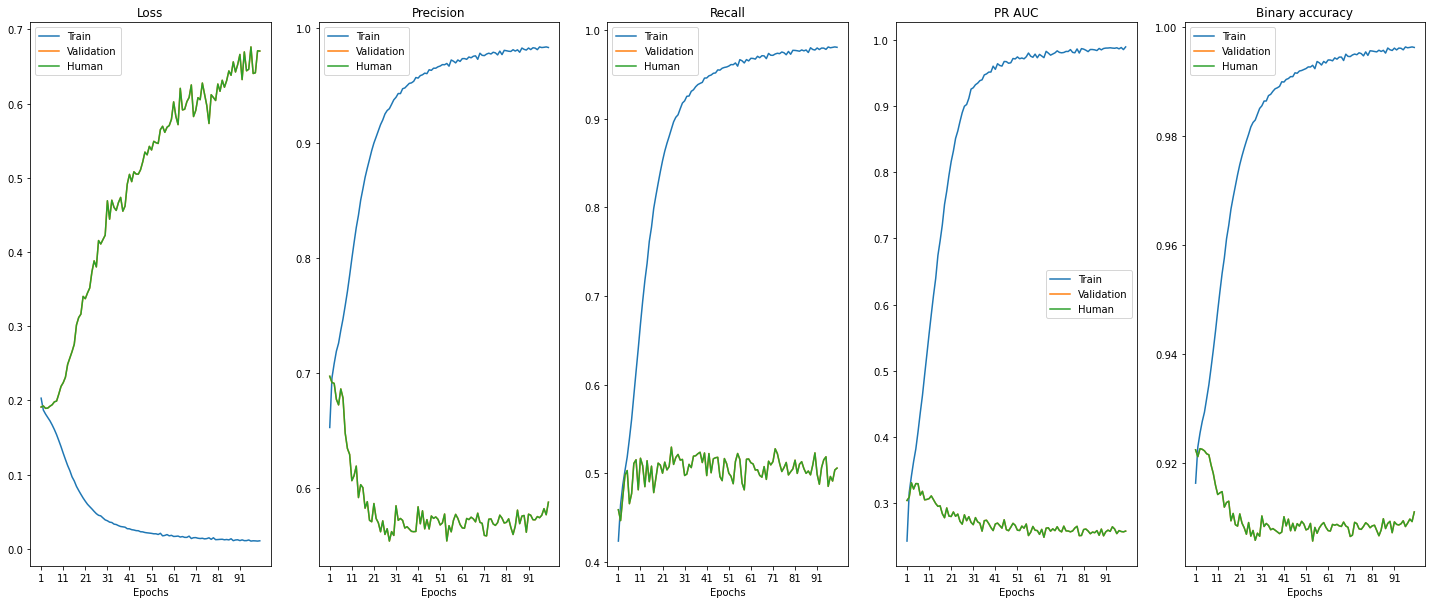

In [4]:
plt.figure(figsize=(25,10))

_ = plt.subplot(1, 5, 1)
plt.plot(range(config['epochs']), training_metrics.loss.values)
plt.plot(range(config['epochs']), training_metrics.val_loss.values)
plt.plot(range(config['epochs']), human_metrics.loss.values)
plt.title('Loss')
plt.xlabel('Epochs')
plt.xticks(np.arange(0, config['epochs'], step=10), np.arange(1, config['epochs'], step=10))
plt.legend(['Train', 'Validation', 'Human'])

_ = plt.subplot(1, 5, 2)
plt.plot(range(config['epochs']), training_metrics.precision.values, label='Training precision')
plt.plot(range(config['epochs']), training_metrics.val_precision.values, label='Validation precision')
plt.plot(range(config['epochs']), human_metrics.precision.values)
plt.title('Precision')
plt.xlabel('Epochs')
plt.xticks(np.arange(0, config['epochs'], step=10), np.arange(1, config['epochs'], step=10))
plt.legend(['Train', 'Validation', 'Human'])

_ = plt.subplot(1, 5, 3)
plt.plot(range(config['epochs']), training_metrics.recall.values, label='Training recall')
plt.plot(range(config['epochs']), training_metrics.val_recall.values, label='Validation recall')
plt.plot(range(config['epochs']), human_metrics.recall.values)
plt.title('Recall')
plt.xlabel('Epochs')
plt.xticks(np.arange(0, config['epochs'], step=10), np.arange(1, config['epochs'], step=10))
plt.legend(['Train', 'Validation', 'Human'])


_ = plt.subplot(1, 5, 4)
plt.plot(range(config['epochs']), training_metrics.pr_auc.values, label='Training PR_AUC')
plt.plot(range(config['epochs']), training_metrics.val_pr_auc.values, label='Validation PR_AUC')
plt.plot(range(config['epochs']), human_metrics.pr_auc.values)
plt.title('PR AUC')
plt.xlabel('Epochs')
plt.xticks(np.arange(0, config['epochs'], step=10), np.arange(1, config['epochs'], step=10))
plt.legend(['Train', 'Validation', 'Human'])

_ = plt.subplot(1, 5, 5)
plt.plot(range(config['epochs']), training_metrics.binary_accuracy.values, label='Training binary acc')
plt.plot(range(config['epochs']), training_metrics.val_binary_accuracy.values, label='Validation binary acc')
plt.plot(range(config['epochs']), human_metrics.binary_accuracy.values)
plt.title('Binary accuracy')
plt.xlabel('Epochs')
plt.xticks(np.arange(0, config['epochs'], step=10), np.arange(1, config['epochs'], step=10))
plt.legend(['Train', 'Validation', 'Human'])


In [ ]:

hf.save_img(config['results_folder'] + '/training_metrics.png')

In [12]:
import datetime

now = datetime.datetime.now()
YEAR = str(now.year)[-2:]
MONTH = str(now.month).zfill(2)
DAY = str(now.day).zfill(2)

filename = f'{DAY}{MONTH}{YEAR}-restoffilename'
print(filename)

140423-restoffilename
